In [1]:
from nltk.corpus import stopwords
import nltk
nltk.download('popular')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users

In [55]:
from nltk import bigrams, ngrams
import wget
import numpy as np
import matplotlib.pyplot as plt

In [59]:
wget.download('https://www.gutenberg.org/files/1661/1661-0.txt')
wget.download('https://www.gutenberg.org/files/1660/1660-0.txt')
wget.download('https://www.gutenberg.org/files/1659/1659-0.txt')

'1659-0.txt'

In [60]:
with open('1660-0.txt', 'r',encoding='utf-8') as f:
    text_sample = f.read()

with open('1661-0.txt', 'r',encoding='utf-8') as f:
    text_sample_2 = f.read()

with open('1659-0.txt', 'r',encoding='utf-8') as f:
    text_sample_3 = f.read()

In [4]:
from collections import Counter
import matplotlib.pyplot as plt

def BoW(text, n=1, clean=False):
    tokens = word_tokenize(text) # tokenize text
    
    if clean:
        tokens = clean_tokens(tokens)

    if n > 1: # optionally use bigrams
        tokens = ngrams(tokens, n)
    
    token_frequency = Counter(tokens) # get Counter (like a dictionary) of the frequency of each token
    return token_frequency


def BoW_hist(token_frequency, n_top=10):
    top_tokens = token_frequency.most_common(n_top)

    w, f = [[i for i,j in top_tokens], [j for i,j in top_tokens]]
    
    fig, ax = plt.subplots(figsize=(6 * n_top/10,4))
    ax.bar(range(n_top), f)
    ax.set_xticks(range(n_top))
    ax.set_xticklabels(w, rotation=45, ha='right')
    
    return fig, ax


def clean_tokens(tokens):
    sw = stopwords.words('english') # nltk's collection of English-language stopwords
    punctuation = [',', '.', ';', '“', '”', '’', '‘', '!', '?', '\'\'', '``', '--'] # non-exhaustive list of punctuation commonly found in the three books of interest
    tokens = [s.lower() for s in tokens]
    tokens = [s for s in tokens if s not in punctuation and s not in sw] # make all tokens lowercase
    return tokens

In [70]:
def vectorizer(documents):
    dictionaries = []
    for i in documents:
        dictionaries.append(dict(BoW(i)))
    #print(len(dictionaries),dictionaries)
    if(len(dictionaries)>1):
        keys = [list(dictionaries[i].keys())+list(dictionaries[i+1].keys()) for i in range(len(dictionaries)-1)]
    else:
        keys = [list(dictionaries[0].keys())]
    vectors = []
    #print(len(keys),keys)
    for i in range(len(dictionaries)):
        #print(type(i))
        dictionary = dictionaries[i]
        vectors.append([dictionary.get(keys[0][j],0) for j in range(len(keys[0]))])
    return keys,vectors



In [47]:
keys,vectors=vectorizer([text_sample,text_sample_2])

In [104]:
def cosine_similarity(vector1,vector2):
    vector1 = list(map(int, vector1))
    vector2 = list(map(int, vector2))
    return np.sum(np.multiply(vector1,vector2))/((np.sqrt((np.sum(np.square(vector1)))))*(np.sqrt((np.sum(np.square(vector2))))))

def similarity_matrice(vectors):
    similarity_matrix =[]
    for i in range(len(vectors)):
        similarity = []
        for j in range(len(vectors)):
            similarity.append(np.round(cosine_similarity(vectors[i], vectors[j]),2))
        similarity_matrix.append(similarity)
    return similarity_matrix

def plot_similarity_matrix(vectors):
    similarity_matrix = np.array(similarity_matrice(vectors))
    #print(similarity_matrix)
    plt.matshow(similarity_matrix)
    plt.title('Similarity Measure')
    labels = ['Text 1','Text 2','Text 3']
    plt.xticks(range(len(labels)), labels)
    plt.yticks(range(len(labels)), labels)
    for i in range(similarity_matrix.shape[0]):
        for j in range(similarity_matrix.shape[1]):
            plt.text(j,i,str(similarity_matrix[i,j]))

    plt.colorbar()
    plt.show()
    


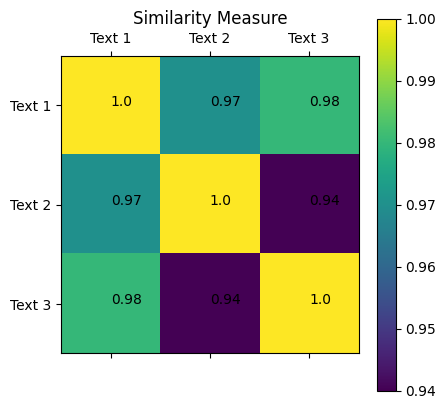

In [105]:
keys,vectors=vectorizer([text_sample,text_sample_2,text_sample_3])
plot_similarity_matrix(vectors)
